In [5]:
# Librerie
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
get_ipython().magic('pylab inline')

Populating the interactive namespace from numpy and matplotlib


In [6]:
dir_df = os.path.join(os.path.abspath(''),'stg')
dir_out = os.path.join(os.path.abspath(''),'output')

In [7]:
df_filename = r'df_tweets.pkl'
df_fullpath = os.path.join(dir_df, df_filename)
df_tweets = pd.read_pickle(df_fullpath)

### G1 - Sentiment Distribution

In [8]:
df_g1 = df_tweets[['sentiment','id']].groupby(['sentiment'],as_index=False).count()
df_g1

,sentiment,id
0,negative,88
1,neutral,440
2,positive,88


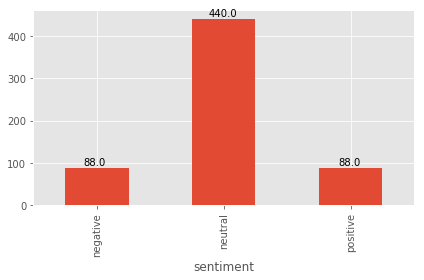

In [9]:
# Report
tp = df_g1.plot(
        x=df_g1['sentiment'],
        kind='bar',
        legend = False)
for p in tp.patches:
    tp.annotate(str(p.get_height()), 
                (p.get_x() * 1.005, p.get_height() * 1.005), 
                ha='center', va='center', xytext=(30, 5), textcoords='offset points')
    tp.plot()

fig_prj = tp.get_figure()
fig_prj.tight_layout()
fig_prj.savefig(os.path.join(dir_out,'sentiment_distr.png'), format='png', dpi=300)

### G2 - Instant of Sentiment

In [10]:
df_tweets.head(2)

,coord,created_at,id,location,place,text,timezone,sentiment
0,None,Sun Mar 19 17:26:30 +0000 2017,843514025287794689,New Jersey,None,#Career #opportunity for #Python Developer (17...,Pacific Time (US & Canada),neutral
1,None,Sun Mar 19 17:26:32 +0000 2017,843514034590769152,"London, England",None,RT @raamana_: So @MathWorks itself put togethe...,None,neutral


### G3 - Position of Sentiment